# Skin Disorder
### Data Information
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology.

They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well.

Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.The names and id numbers of the patients were recently removed from the database.

# Necessary Libaray

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data Loading

In [2]:
#loading data using pandas
data = pd.read_csv('dataset_35_dermatology (1).csv')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


# Basic Checks

In [3]:
#size of data set
data.shape

(366, 35)

In [4]:
#first 5 records of data
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
# Features of the data
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [6]:
# datatypes of all features and checking NUll values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [7]:
##checking values of column AGE
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [8]:
#checking number of rows having AGE value "?"
data.loc[data['Age'] == '?']

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [9]:
#removing those Valuse having AGE == '?'
data.drop(axis=1,index=[33,34,35,36,262,263,264,265],inplace=True)

In [10]:
#Rechecking Values
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '28', '64', '39', '47',
       '16', '0', '7', '70', '37', '61', '67', '56', '53', '24', '58',
       '49', '63', '68', '9', '75'], dtype=object)

In [11]:
#Changeing Datatype of AGE feature
data['Age'].astype('int64')

0      55
1       8
2      26
3      40
4      45
       ..
361    25
362    36
363    28
364    50
365    35
Name: Age, Length: 358, dtype: int64

In [12]:
#stats of data set
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.170391,0.379888,0.622905,0.530726,...,0.399441,0.474860,0.460894,0.949721,0.458101,0.106145,0.117318,1.877095,0.558659,2.782123
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.576394,0.837388,0.990278,0.912352,...,0.856479,0.871705,0.959914,1.129060,0.959796,0.455180,0.493863,0.699324,1.107990,1.593936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


### Insights/Obervation:-
<ol>
<li>Shape of Data set is 366 rows and 35 features.
<li>There is no Null value present in DataSet.
<li>Datatype of feature AGE is found to be object.Check the unique values and found '?' as a value.Removed those values and converted feature into 'int64' Dataype.
<li>New Shape of Dataset is 358 rows
</ol>

# Data Visualization

In [13]:
data['class'].value_counts()

1    111
3     71
2     60
4     48
5     48
6     20
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='Count'>

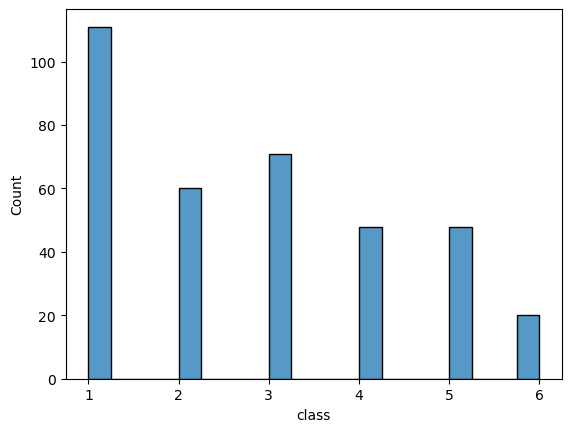

In [14]:
#checking number of count of all classes
sns.histplot(data['class'],bins=20)

**Order of Count of Diseases: Class1 > Class3 > Class2 > Class5 = Class4 > Class6.**

**Class1 has highest number of patient.**

<AxesSubplot:xlabel='class', ylabel='knee_and_elbow_involvement'>

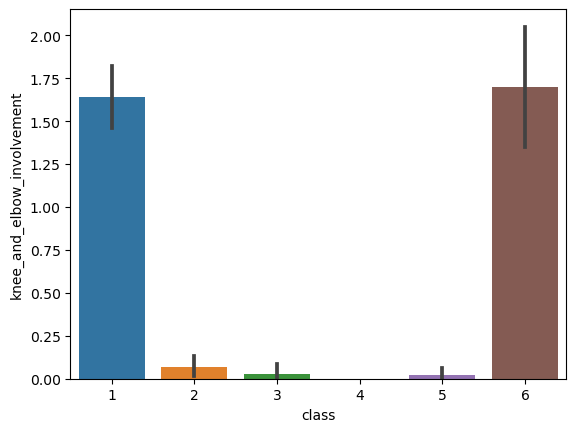

In [15]:
# Checking knee_and_elbow_involvement vs classes
sns.barplot(data=data,x='class',y='knee_and_elbow_involvement')

**Diesease of Class1 & Class6 has more involvement of Knee and Elbow, Compare to other Classes**

<AxesSubplot:xlabel='class', ylabel='oral_mucosal_involvement'>

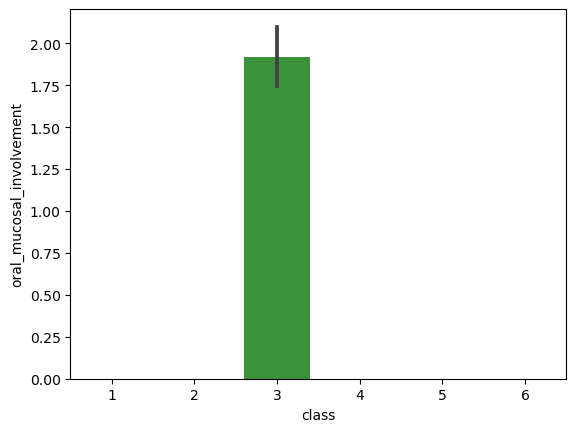

In [16]:
# Checking oral_mucosal_involvement vs classes
sns.barplot(data=data,x='class',y='oral_mucosal_involvement')

**Diesease of Class3 only has involvement of Oral Mucosai**

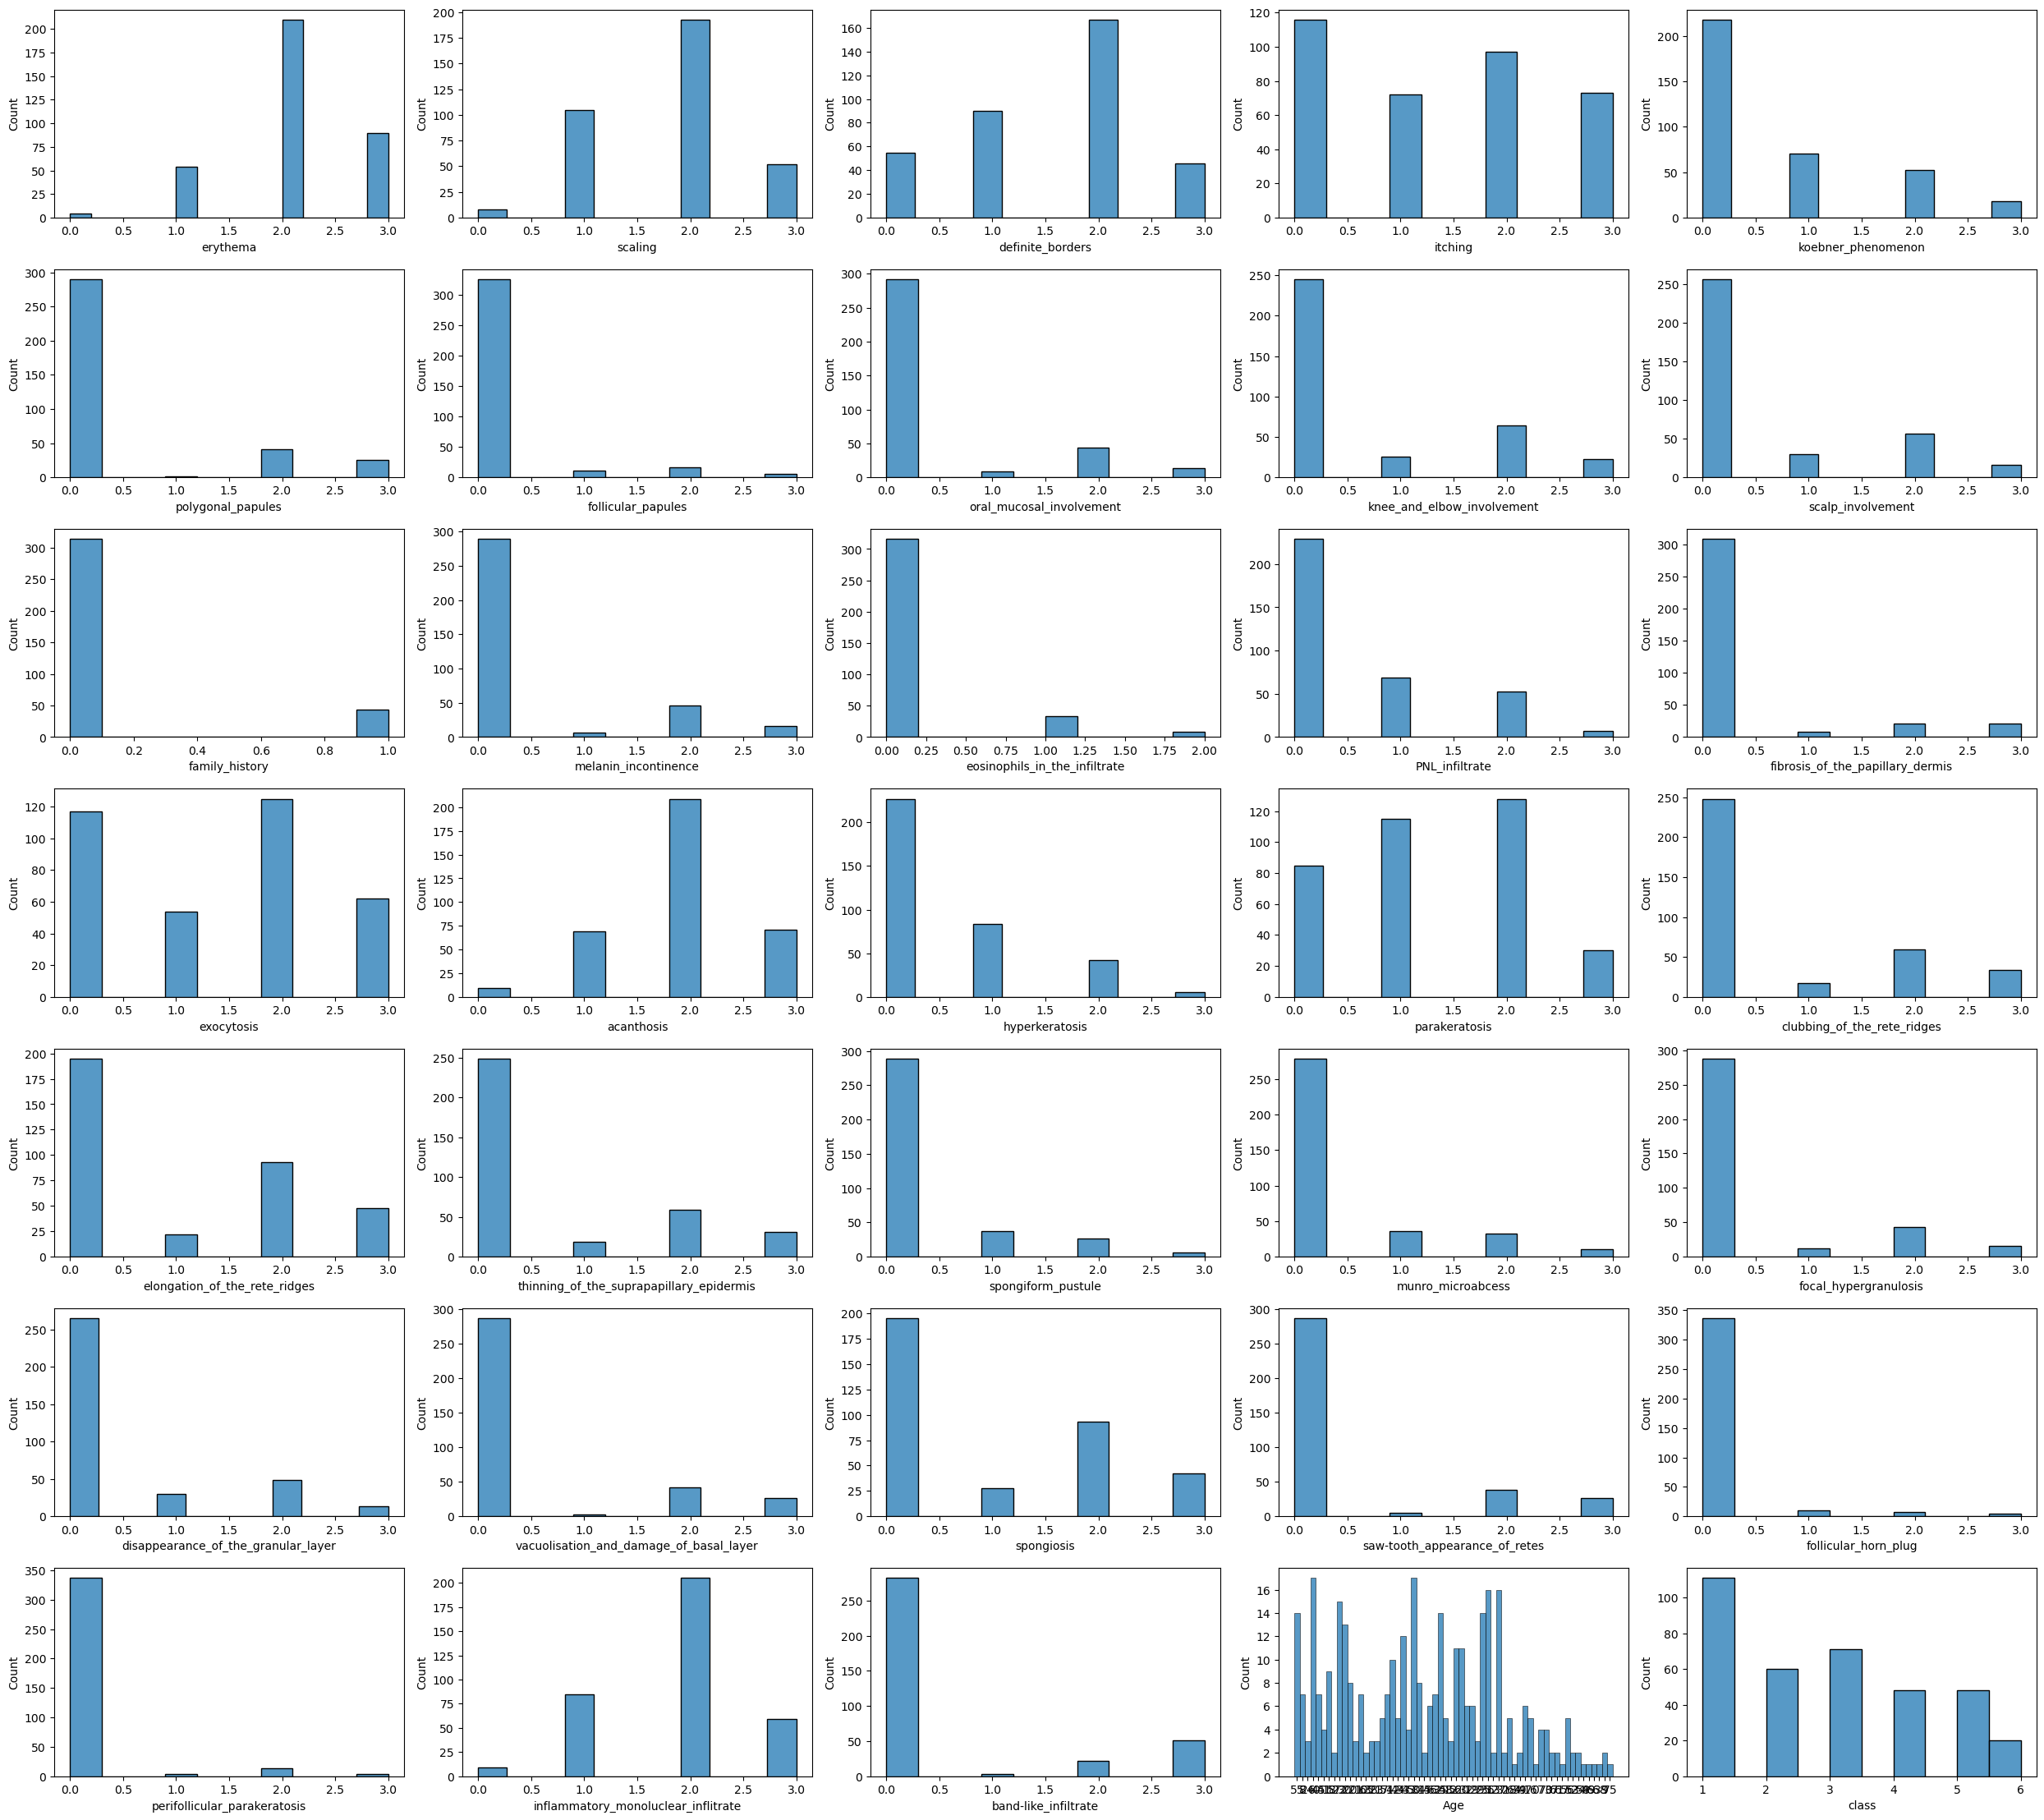

In [17]:
#Count of all features
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(8,5,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

**The count of all the features is displayed in the graph above.**

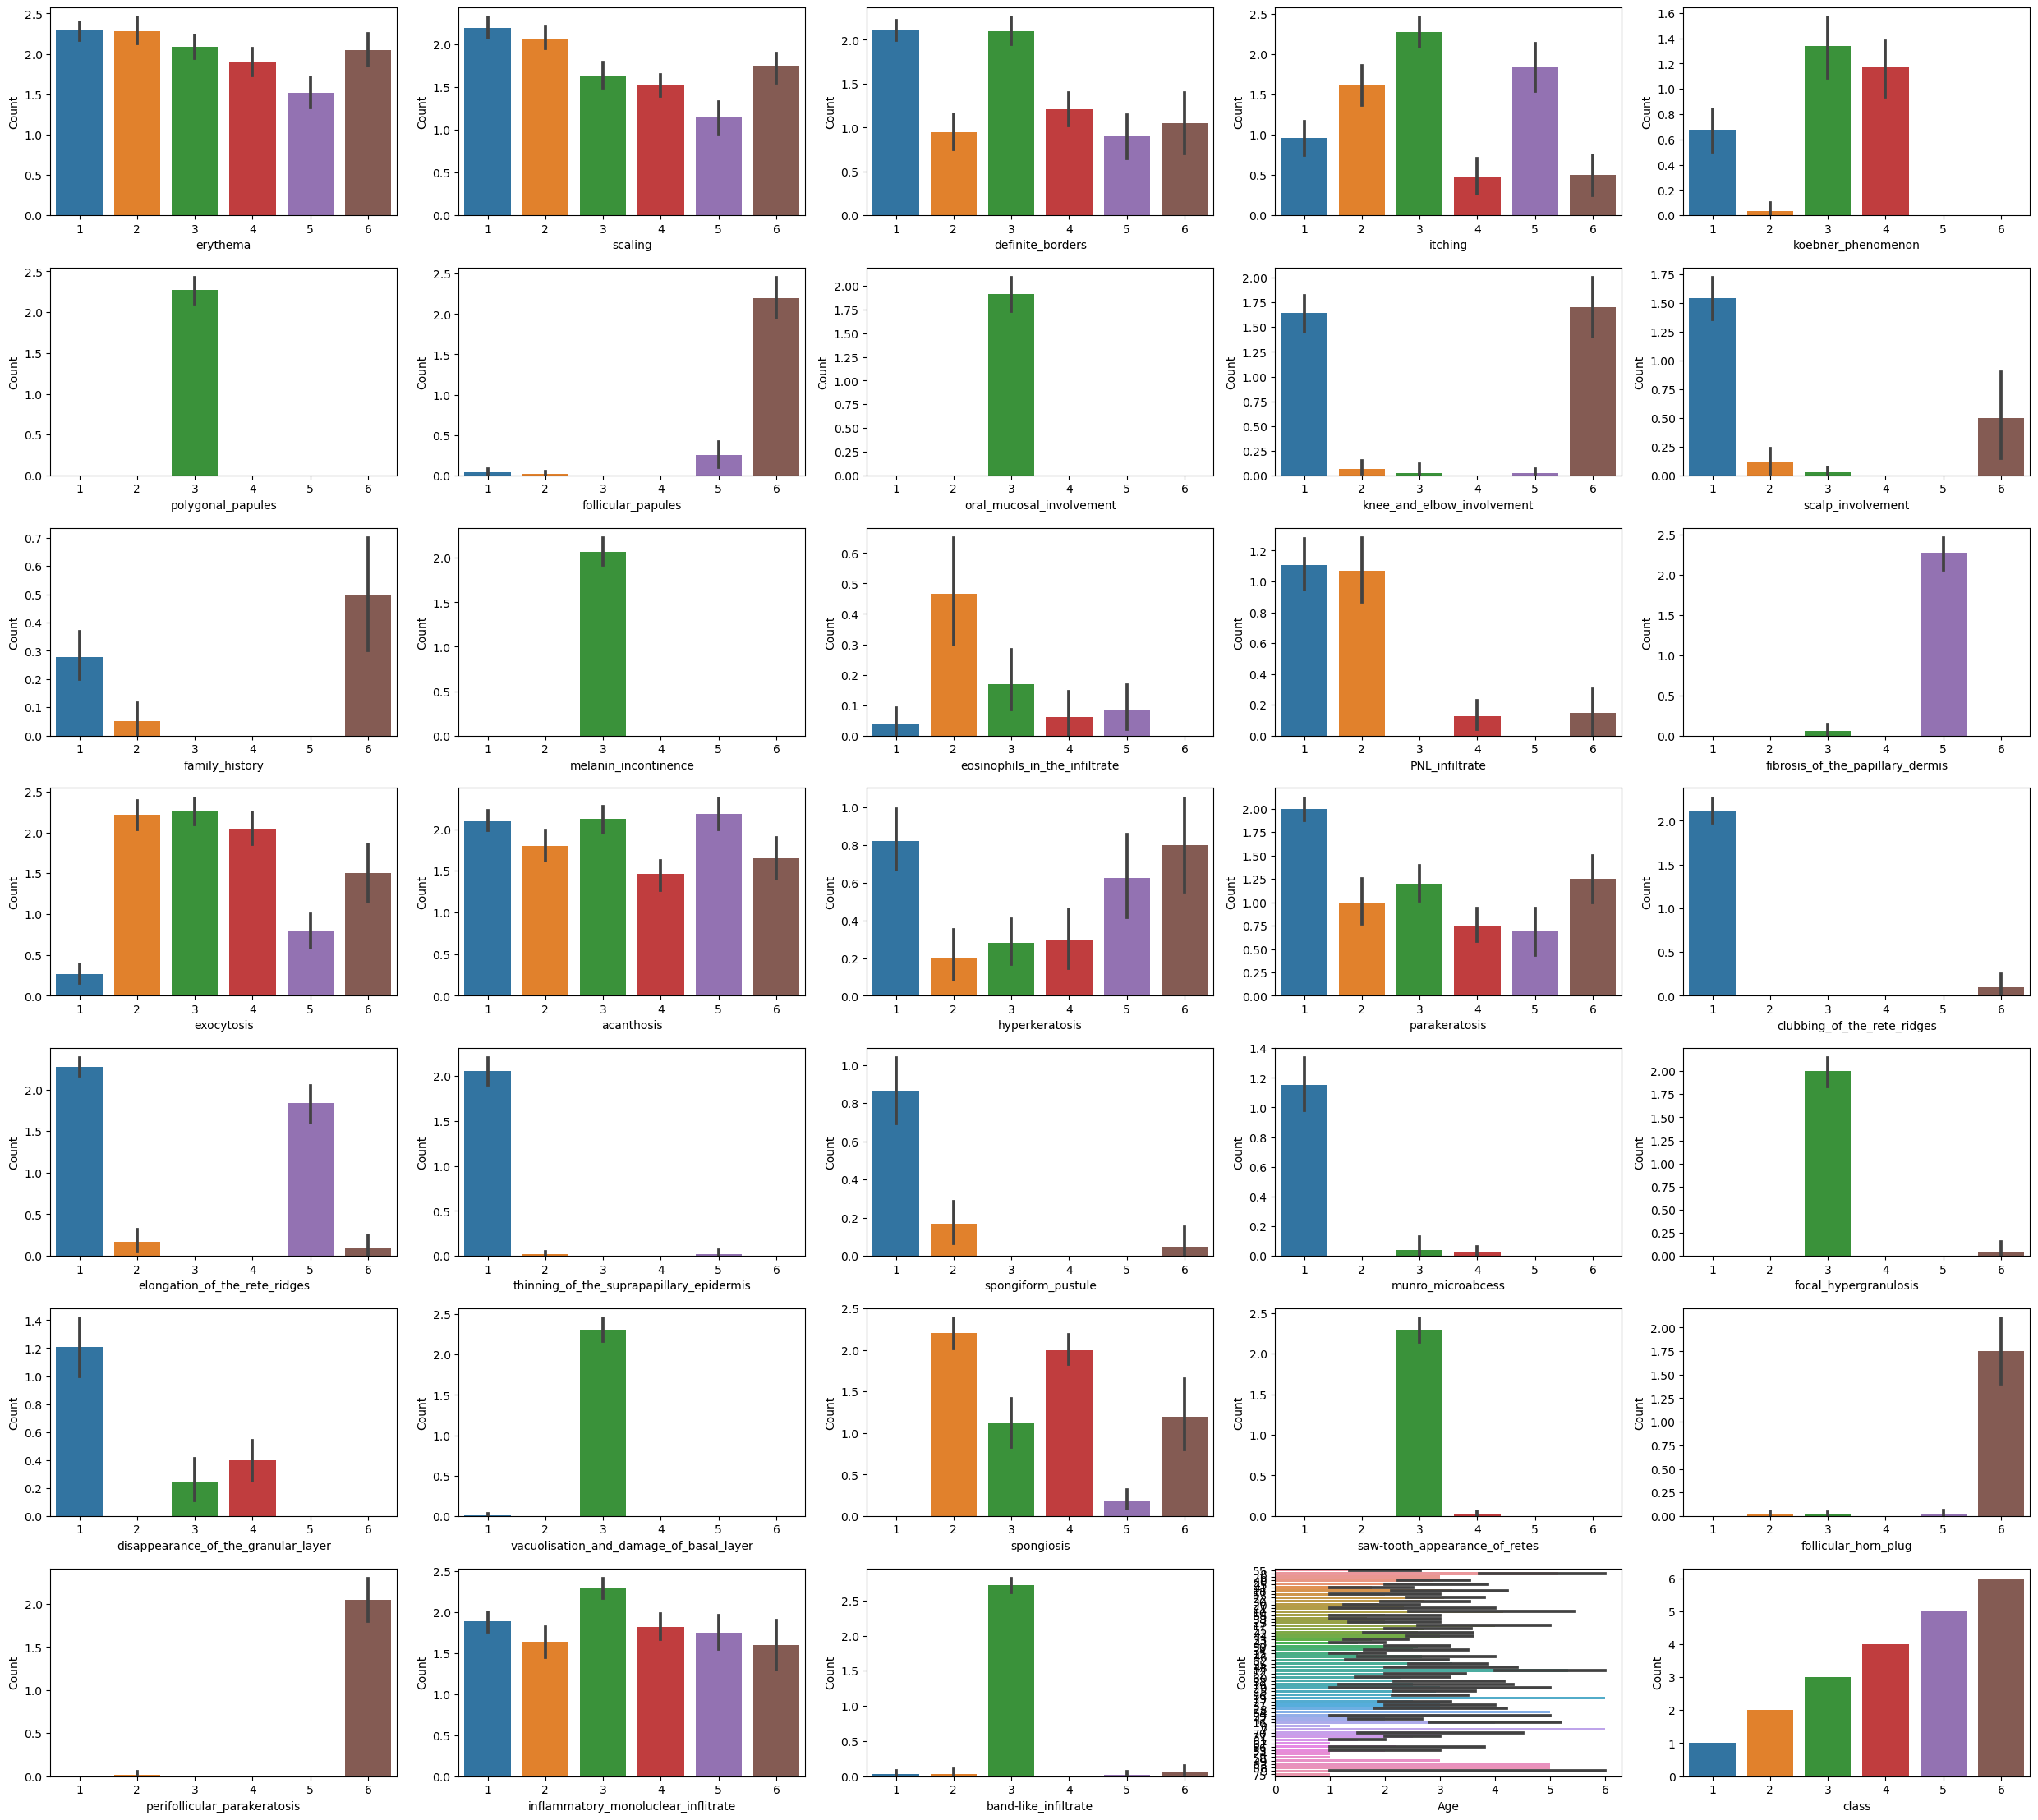

In [18]:
#Count of all features with respect to class
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(8,5,plotnumber)
        sns.barplot(x=data['class'],y=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

**Diesease characteristics that have the greatest impact on Skin Disorder Classes.**

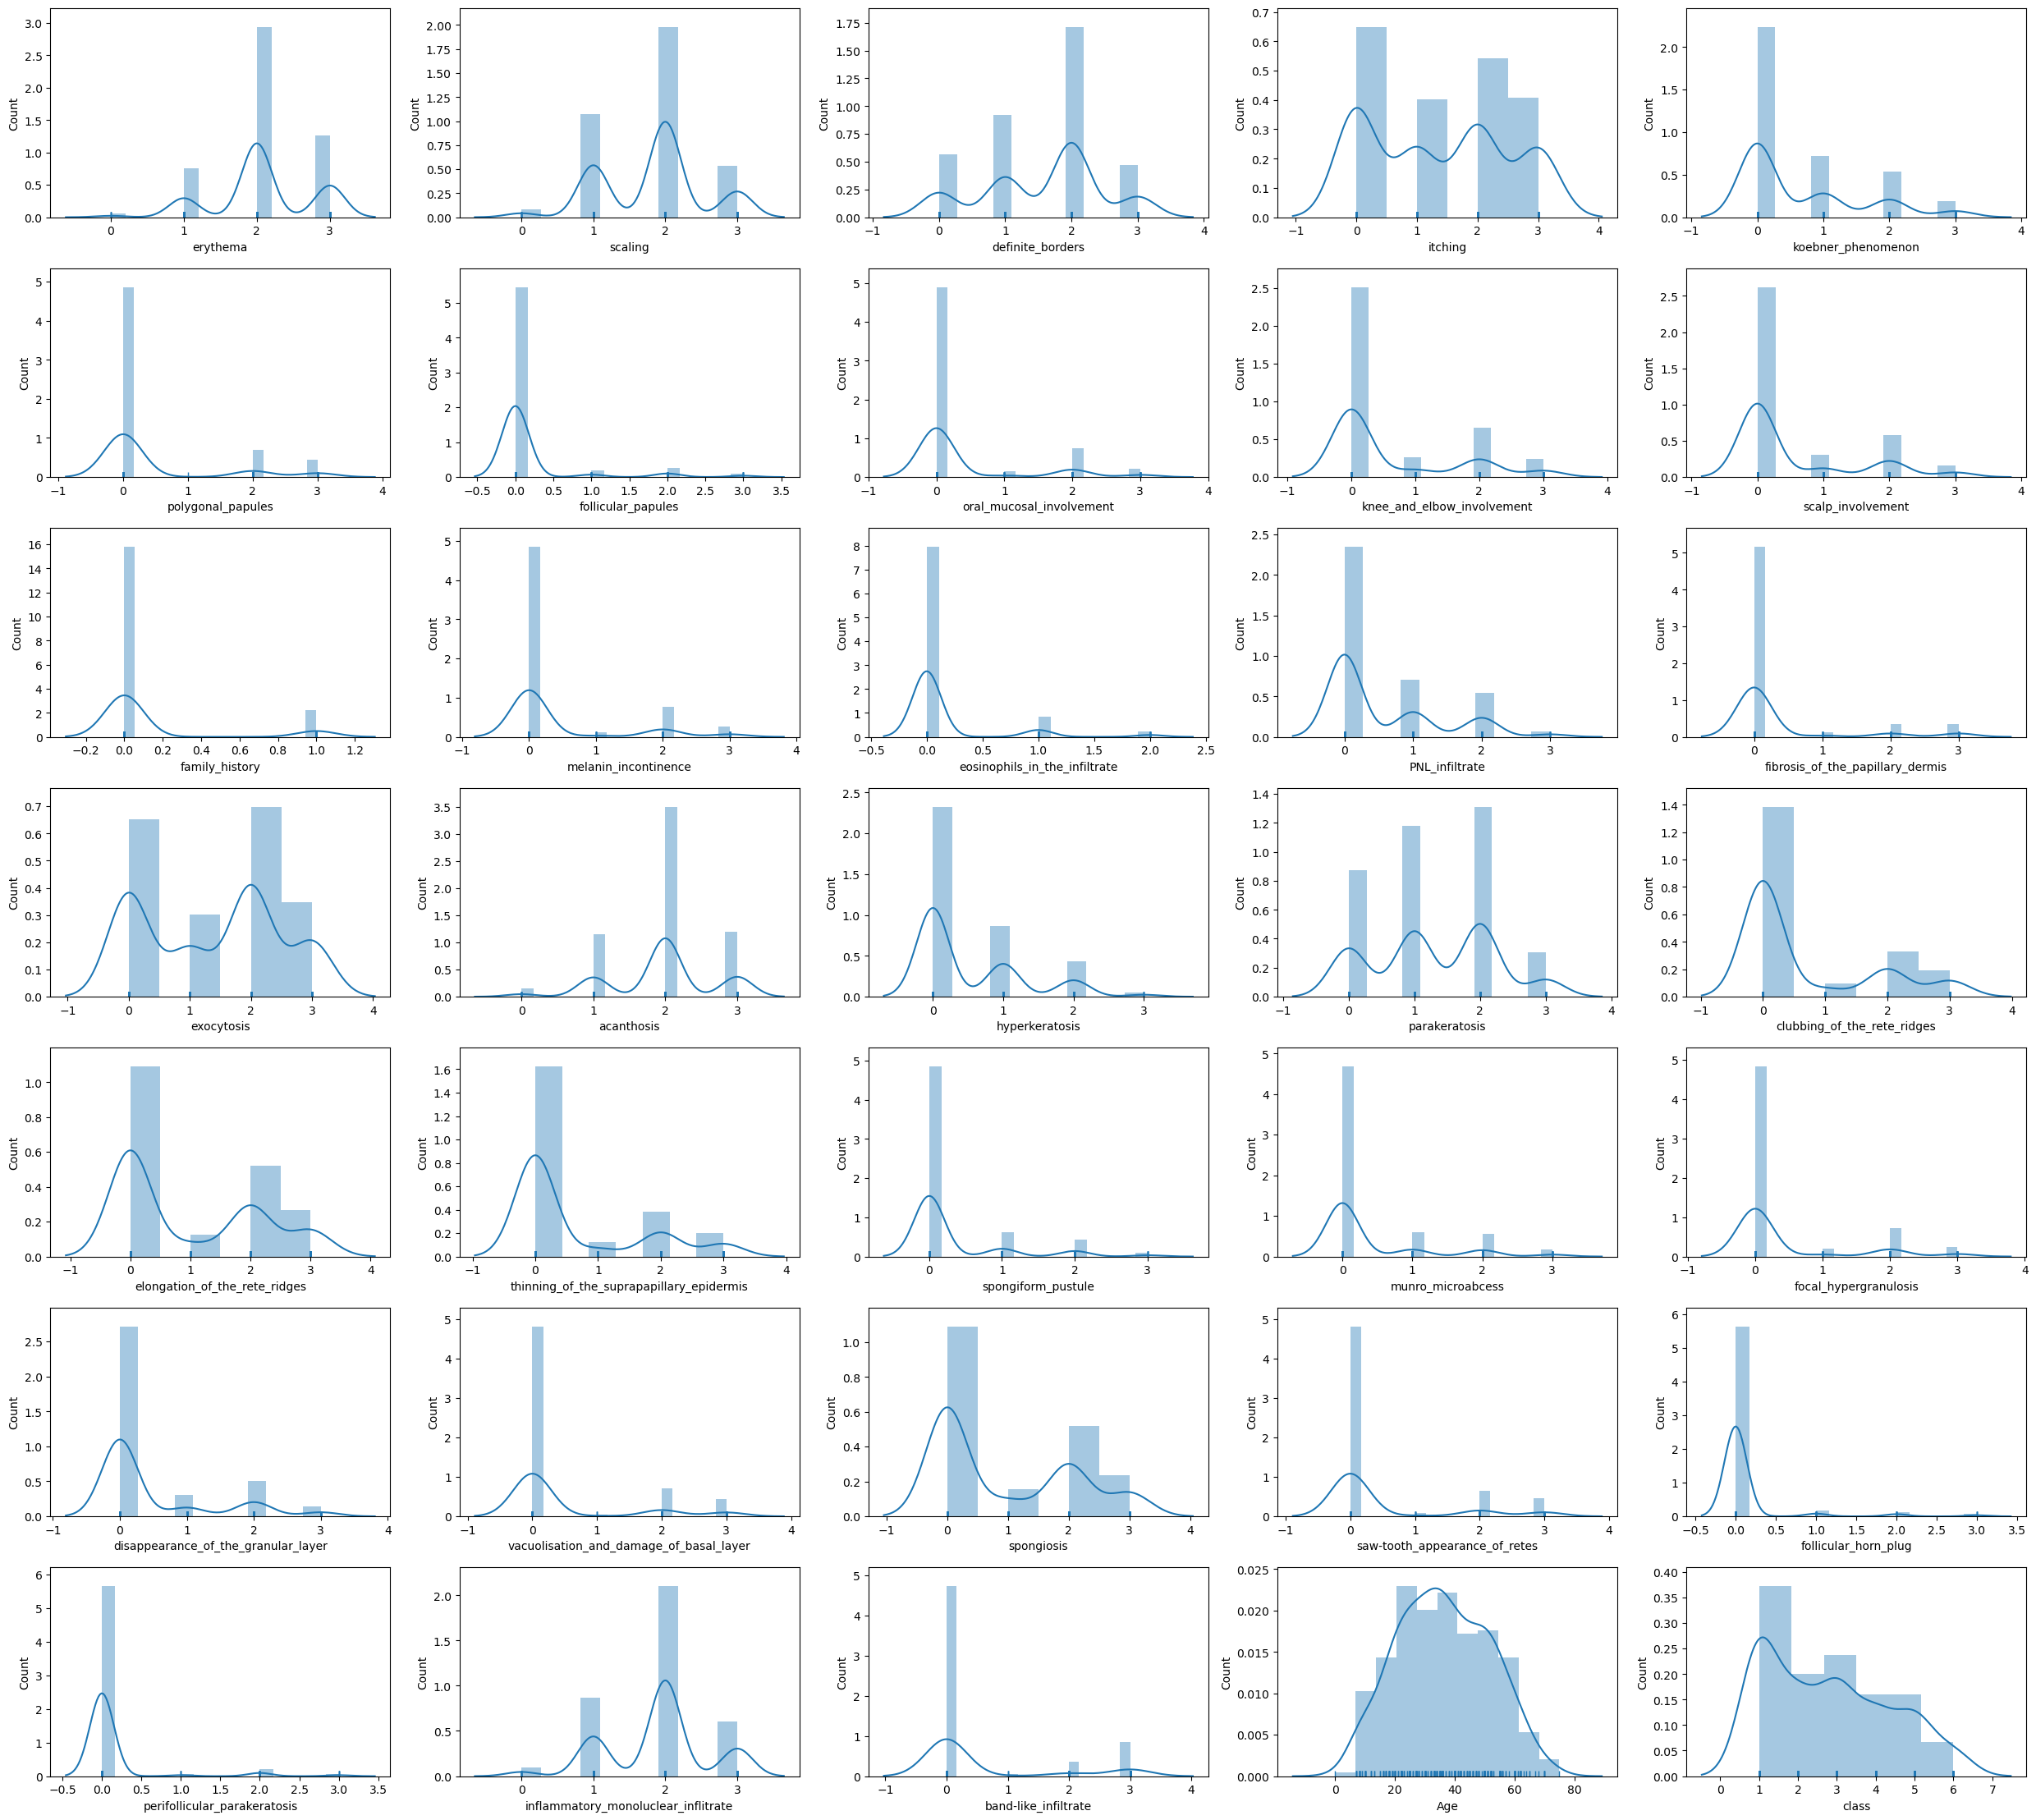

In [19]:

plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=35:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column], hist=True, rug=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [21]:
len(data.columns)

35

# Feature Selection
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

<AxesSubplot:>

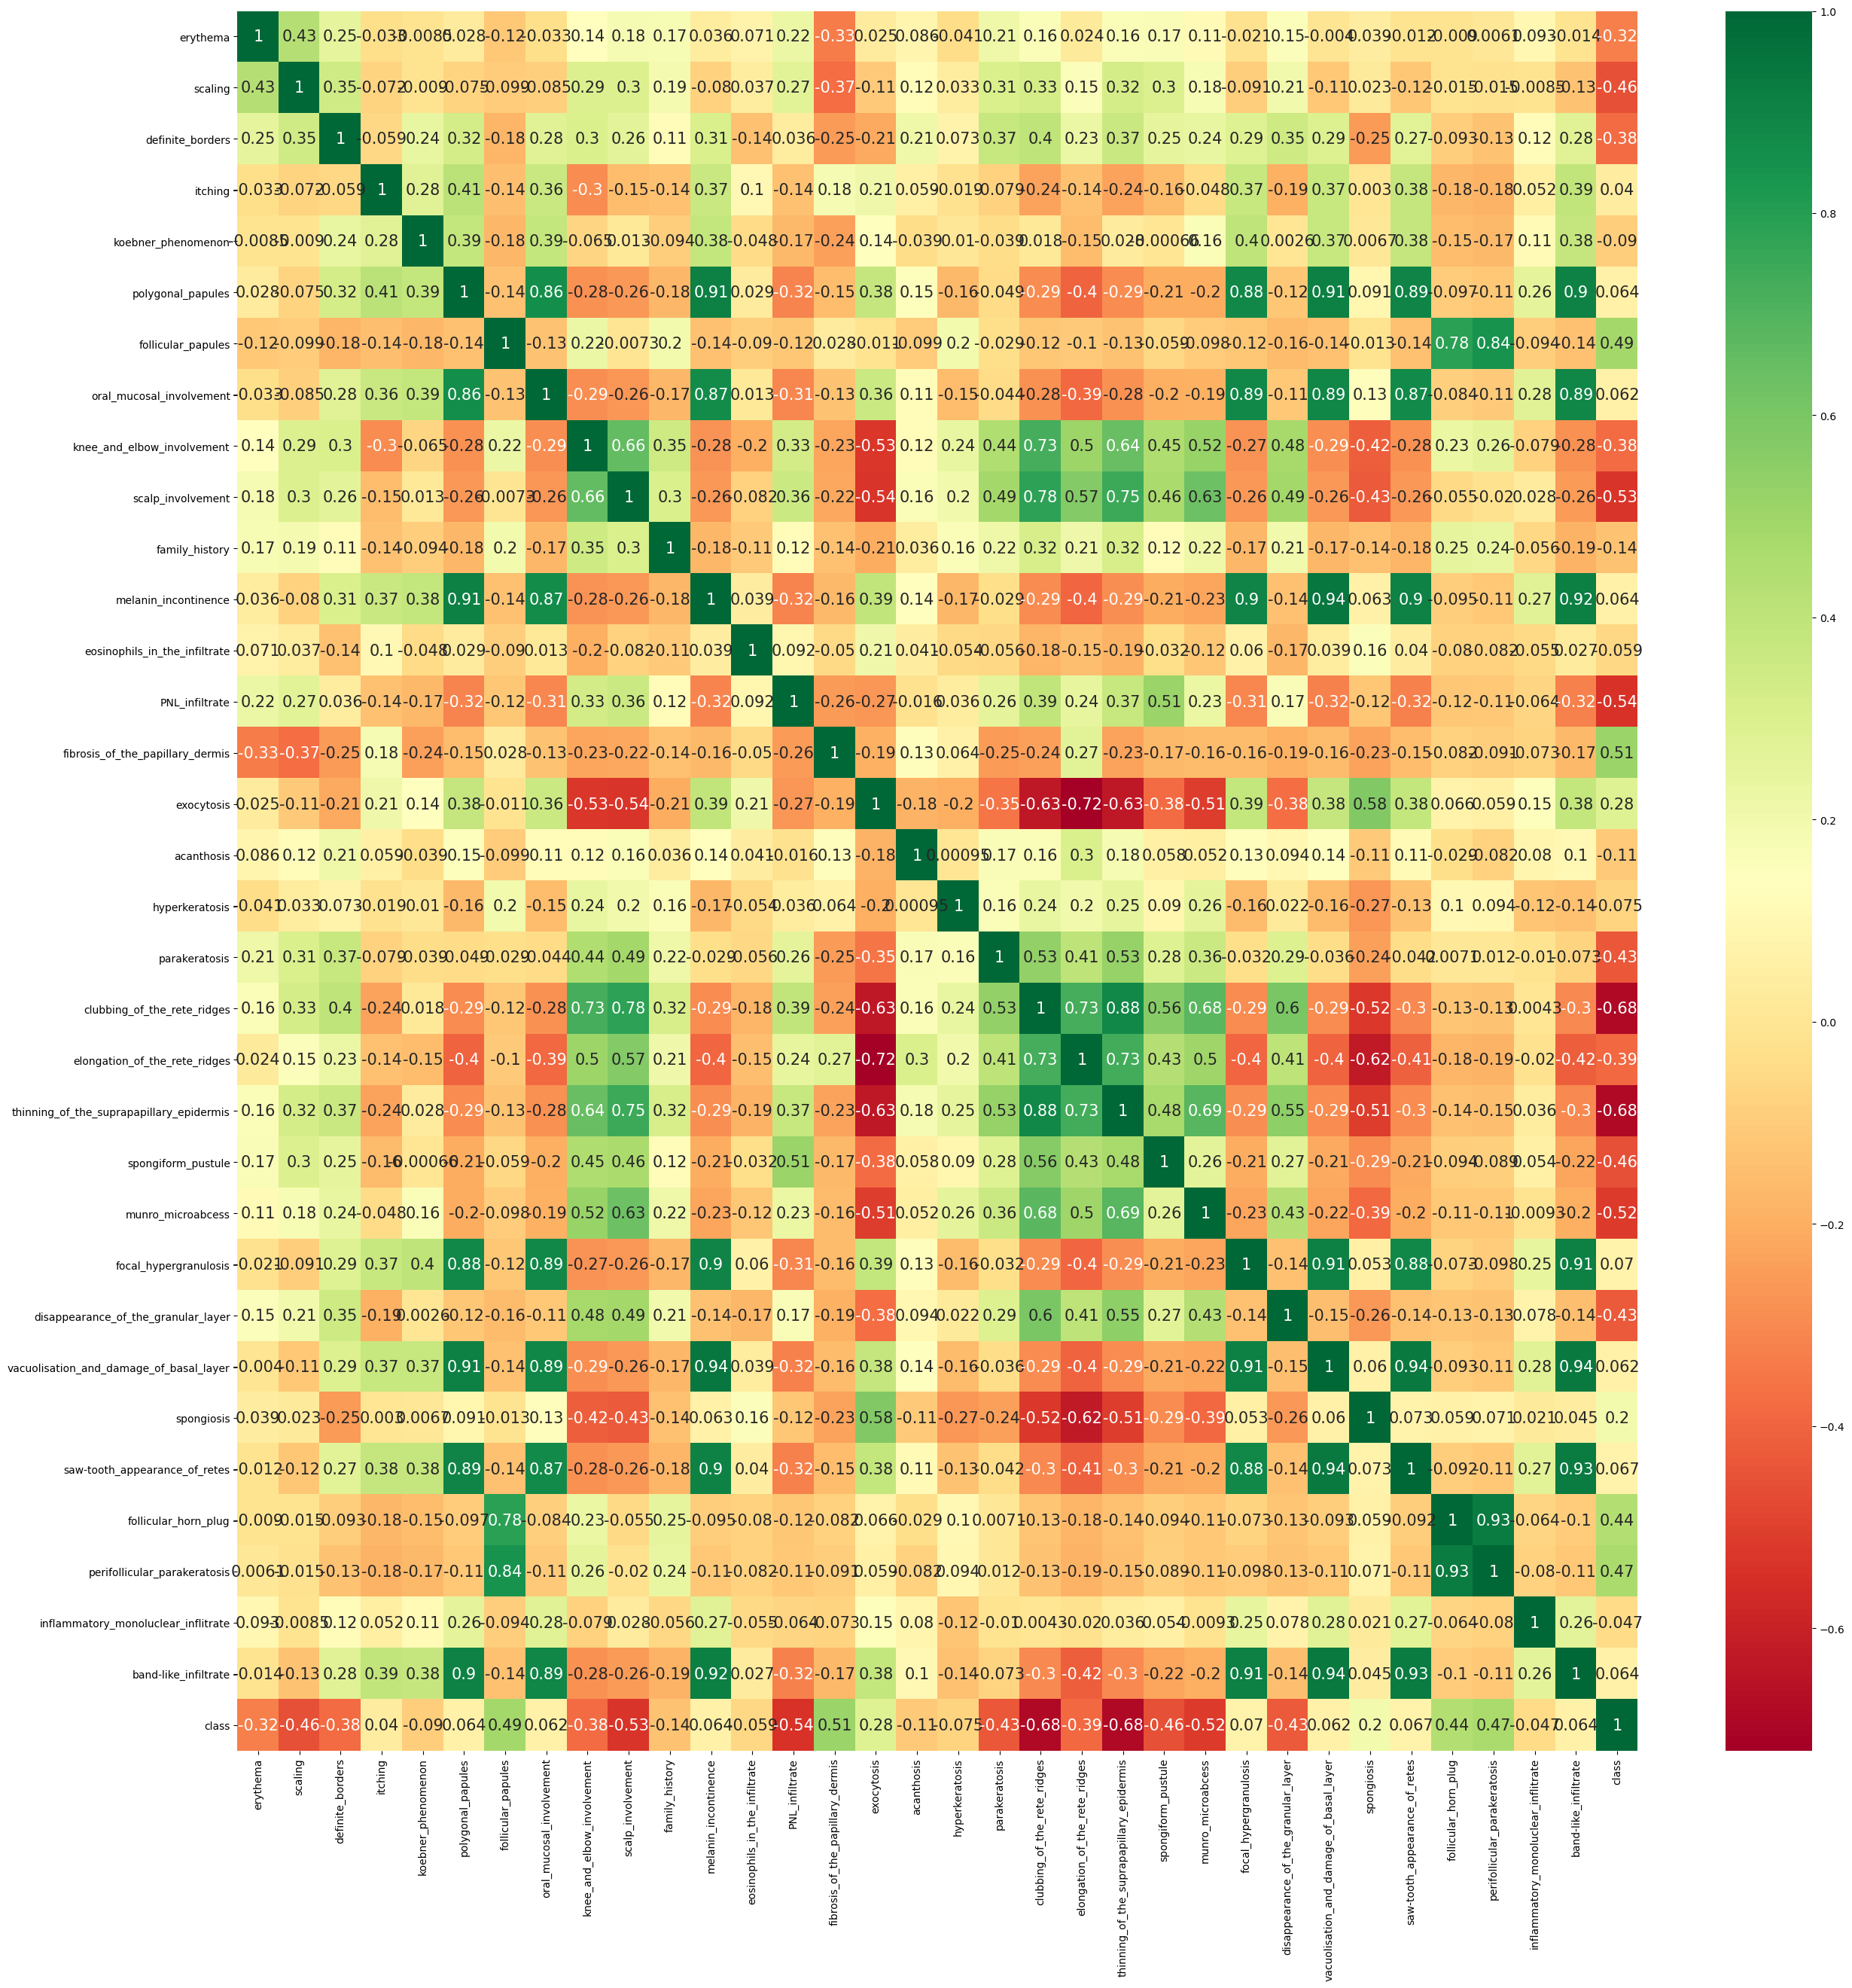

In [22]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

[0.00782043 0.01872515 0.01492153 0.02653742 0.04780803 0.03828388
 0.02048222 0.02815577 0.03107711 0.02624885 0.00532048 0.0237843
 0.0122571  0.04044184 0.06799388 0.04069654 0.00782518 0.00897493
 0.01194349 0.075638   0.05706168 0.07575731 0.00799489 0.01420979
 0.03498698 0.02645005 0.03983463 0.05962472 0.028404   0.01720104
 0.02577867 0.00607307 0.04179705 0.00989   ]


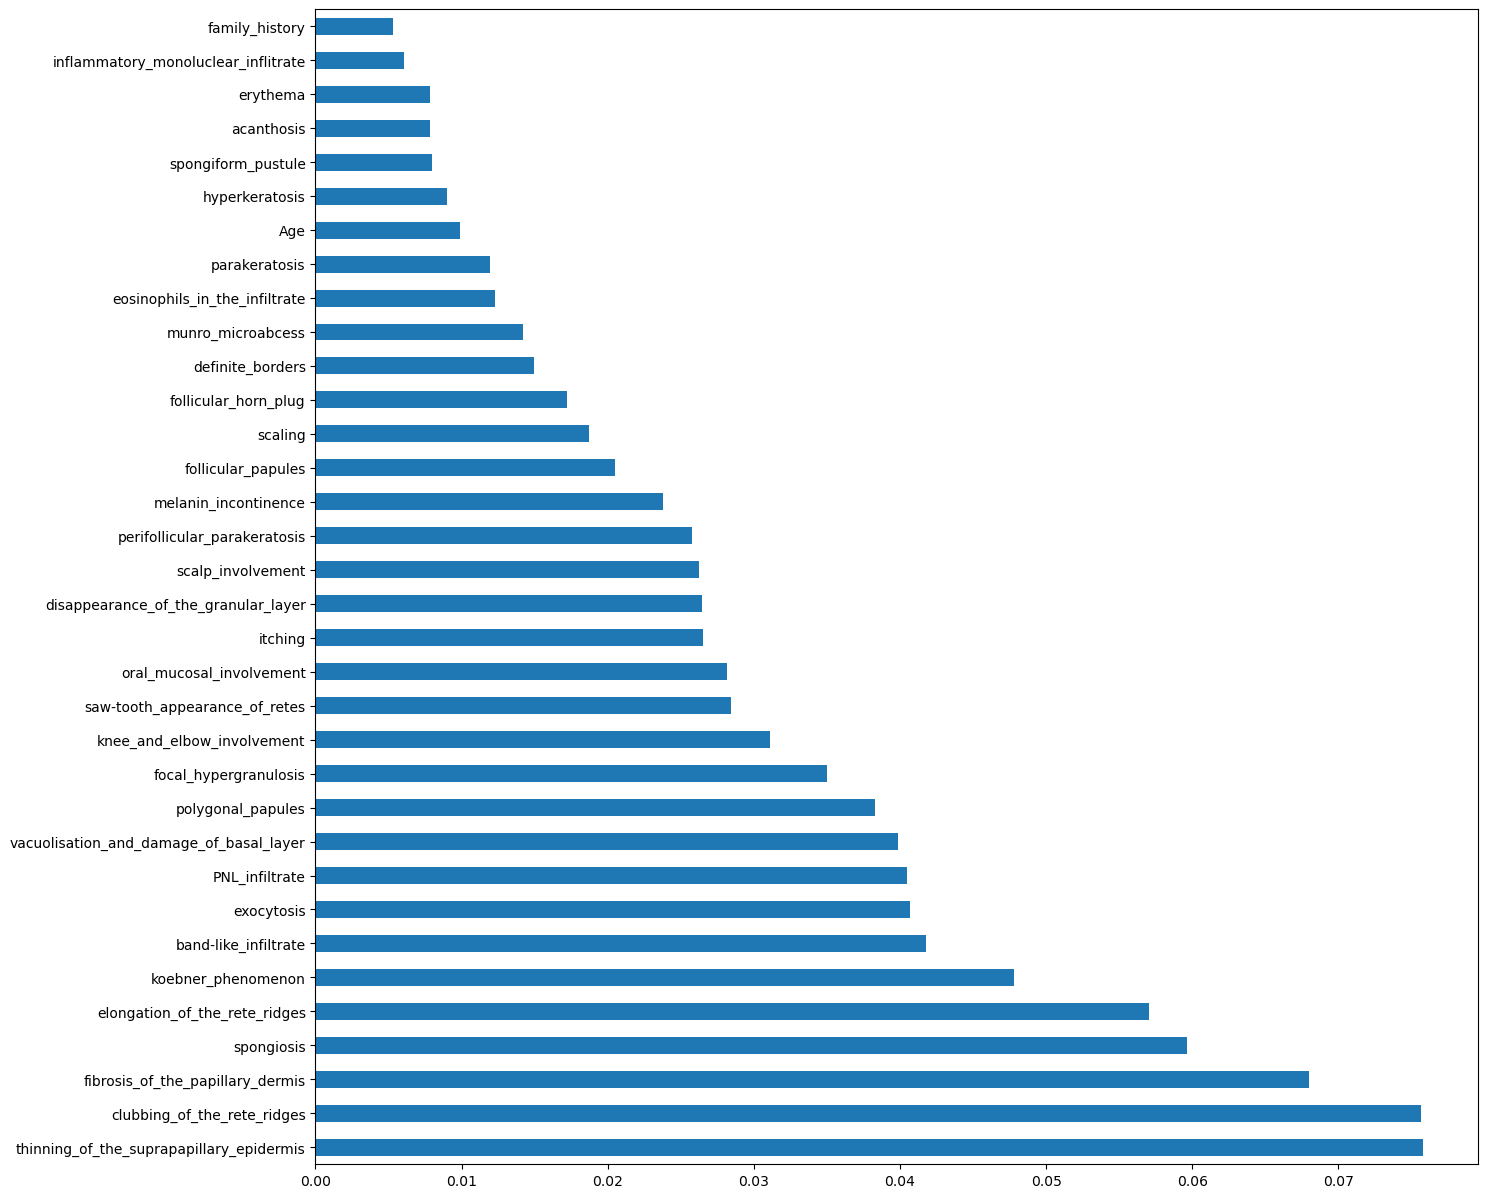

In [23]:
X = data.iloc[:,0:34]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(34).plot(kind='barh')
plt.show()

**Observation/Insights:The following features should be extracted for the predictive model using the heatmap and ExtraTreeClassifier.**

In [24]:
#Creating new data set by removing the less important features.
final_data = data.drop(['family_history','inflammatory_monoluclear_inflitrate','acanthosis'
                       ,'hyperkeratosis','erythema','Age','eosinophils_in_the_infiltrate'
                       ,'definite_borders','spongiform_pustule','parakeratosis','follicular_horn_plug'
                       ,'scaling','follicular_papules'], axis=1)

In [25]:
#Glance at new Dataset
final_data.head()

,itching,koebner_phenomenon,polygonal_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,melanin_incontinence,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,...,thinning_of_the_suprapapillary_epidermis,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,perifollicular_parakeratosis,band-like_infiltrate,class
0,3,0,0,0,1,0,0,0,0,3,...,0,0,0,0,0,3,0,0,0,2
1,2,1,0,0,1,1,0,1,0,1,...,2,1,0,0,0,0,0,0,0,1
2,3,1,3,3,0,0,1,0,0,1,...,0,0,2,0,2,3,2,0,3,3
3,0,0,0,0,3,2,0,3,0,0,...,2,0,0,3,0,0,0,0,0,1
4,2,2,2,2,0,0,1,0,0,1,...,0,0,2,2,3,2,3,0,3,3


# Train & Test Split

In [26]:
#Spliting dataset into test & train data to train model
X = data.iloc[:,0:21]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=47,test_size=0.3)

# Model Training and Evaluation

## 1.Logistic Regression

In [27]:
#defining instance of Logistic Regression
log_reg = LogisticRegression()

In [28]:
# Hyper parameter Turning
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

log_reg_hypertuned = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

log_reg_hypertuned.fit(X,y)

print(log_reg_hypertuned.best_estimator_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
LogisticRegression(C=0.2976351441631313, solver='liblinear')


In [29]:
y_predict = log_reg_hypertuned.predict(X_test)
print('Accuracy of Logistic Regression',accuracy_score(y_test, y_predict))

Accuracy of Logistic Regression 0.9814814814814815


## 2. Random Forest Implementation

In [30]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


In [31]:
rf_clf2 = RandomForestClassifier(**rf_best_params)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing
print('Accuracy of Random Forest',accuracy_score(y_test, y_predict))#checking performance

Accuracy of Random Forest 0.9537037037037037


## 3. K-Nearest Neighbor Algorithm

In [38]:
#Menentukan list hyperparameter yang akan dituning
leaf_size = list(range(1,50))
metrics = ['euclidean'] 
neighbors = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29])
param_grid  = dict(metric=metrics, n_neighbors=neighbors)

knn_tune = KNeighborsClassifier()
modelgridsearch = GridSearchCV(knn_tune, param_grid, cv=10,scoring='accuracy')
best_model = modelgridsearch.fit(X_train, y_train)

print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 3


In [39]:
y_predict = modelgridsearch.predict(X_test)
print('Accuracy of K-Nearest Neighbor',accuracy_score(y_test, y_predict))#checking performance

Accuracy of K-Nearest Neighbor 0.9444444444444444


## 4. Support Vector Classification

In [40]:
# defining parameter range
#parameter grid takes a dictionary containg list of values of each hyperparameter
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, refit = True, verbose = -1)
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [50]:
grid_predictions = grid.predict(X_test)
print('Accuracy of Support Vector Classification',accuracy_score(y_test, grid_predictions))#checking performance

Accuracy of Support Vector Classification 0.9444444444444444


# Conclusion
Many different machine learning methods are applied in the diagnosis of erythema squamous skin diseases. Each method classifies disease withreasonable accuracy.<br>

Clinical and histopathological data obtained from the patient are used in the diagnosis of the disease. The specialist doctor uses these data tomake the most appropriate diagnosis decision for the patient. With the experience of the medical profession, the specialist physician can decidewhether the erroneous data is compatible with the relevant disease and can eliminate the erroneous values.<br>

Outlier values in the data set cause incorrect rates to be obtained in the results of the applied classification method.
Outlier data were removed from the dataset in order to obtain a classification result that fully reflects the clinical and histopathological features of
the diseases.<br>

As a result, machine learning classification rates have been successfully achieved.
<ul>
<li>Accuracy of Logistic Regression 0.9814814814814815
<li>Accuracy of Random Forest 0.9537037037037037
<li>Accuracy of K-Nearest Neighbor 0.9444444444444444
<li>Accuracy of Support Vector Machine 0.9444444444444444
</ul>
<b>Based on the observations above, we can conclude that Logistic Regression is the best-fitting model with 98% accuracy for the given problem.</b>

# Save Logistic Regression Model

In [ ]:
#Saving the model using pickle
pickle.dump(log_reg_hypertuned, open('Reg_model.pkl', 'wb'))

# Load the model

In [ ]:
pickled_model = pickle.load(open('Reg_model.pkl', 'rb'))
pickled_model.predict(X_test)